# Comparing Models With k-fold Cross-validation

### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Data preparation

In [2]:
# importing data
data_path= '../data/diamonds.csv'
diamonds = pd.read_csv(data_path)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['cut'], prefix='cut', drop_first=True)],axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['color'], prefix='color', drop_first=True)],axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['clarity'], prefix='clarity', drop_first=True)],axis=1)
diamonds.drop(['cut','color','clarity'], axis=1, inplace=True)

### Preparing objects for modelling

In [3]:
from sklearn.preprocessing import RobustScaler
target_name = 'price'
robust_scaler = RobustScaler()
X = diamonds.drop('price', axis=1)
X = robust_scaler.fit_transform(X)
y = diamonds[target_name]

## Comparing 3 models using cross-validation scores

In [4]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import cross_validate

In [5]:
## KNN
knn = KNeighborsRegressor(n_neighbors=20, weights='distance', metric='euclidean', n_jobs=-1)
knn_test_mse = cross_validate(estimator=knn,X=X,y=y,
                                    scoring='mean_squared_error', 
                                    cv=10, n_jobs=-1)['test_score']

## Random Forests
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF_test_mse = cross_validate(estimator=RF,X=X,y=y,
                                    scoring='mean_squared_error', 
                                    cv=10, n_jobs=-1)['test_score']

## Boosting
boosting = AdaBoostRegressor(n_estimators=50, learning_rate=0.05, random_state=55)  
boosting_test_mse = cross_validate(estimator=boosting,X=X,y=y,
                             scoring='mean_squared_error', 
                             cv=10, n_jobs=-1)['test_score']

In [6]:
mse_models = -1*pd.DataFrame({'KNN':knn_test_mse,
                           'RandomForest': RF_test_mse,
                           'Boosting':boosting_test_mse})

In [7]:
mse_models

,Boosting,KNN,RandomForest
0,1.871637e+06,6.261917e+05,3.751482e+05
1,3.796796e+06,5.654357e+05,4.506298e+05
2,2.928736e+06,1.172655e+06,1.413179e+06
3,7.420615e+06,2.856918e+06,2.360007e+06
4,1.004345e+07,1.346273e+07,5.753556e+06
5,3.616306e+06,3.056937e+06,1.351211e+06
6,3.880890e+04,4.662510e+04,2.460778e+04
7,5.167800e+05,1.218936e+05,6.391719e+04
8,6.208819e+05,2.427801e+05,1.190176e+05
9,6.810013e+05,4.797159e+05,1.917342e+05


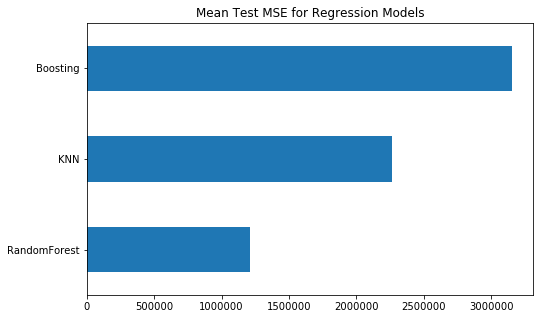

In [8]:
fig, ax = plt.subplots(figsize=(8,5))
mse_models.mean().sort_values().plot(kind='barh', ax=ax)
ax.set_title('Mean Test MSE for Regression Models');

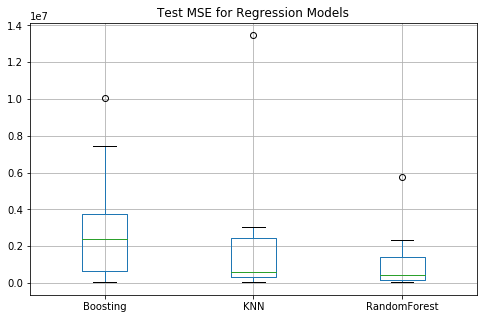

In [9]:
fig, ax = plt.subplots(figsize=(8,5))
mse_models.boxplot(ax=ax)
ax.set_title('Test MSE for Regression Models');

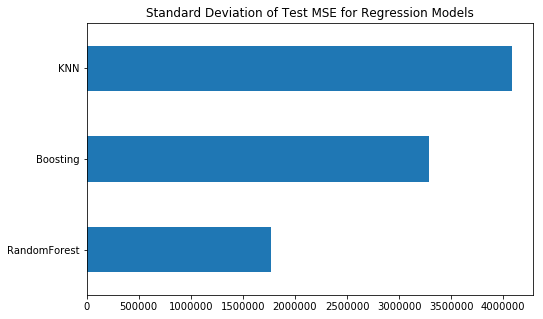

In [10]:
fig, ax = plt.subplots(figsize=(8,5))
mse_models.std().sort_values().plot(kind='barh', ax=ax)
ax.set_title('Standard Deviation of Test MSE for Regression Models');

### Exercise: compare the 4 models used with the credit card default dataset using cross-validation, then pick the best one